# Импорт библиотек

In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Загрузка данных

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_ID = train['Id']
test_ID = test['Id']

#Дропнем колонку Id, предварительно её сохранив
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
print("Размер тренировочного датасета : {} ".format(train.shape))
print("Размер тестового датасета : {} ".format(test.shape))

Размер тренировочного датасета : (1460, 80) 
Размер тестового датасета : (1459, 79) 


# Объединим train и test выборки

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Размер итоговой выборки : {}".format(all_data.shape))

Размер итоговой выборки : (2919, 79)


# Посмотрим на пропущенные данные

In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Процент пропусков по признакам')

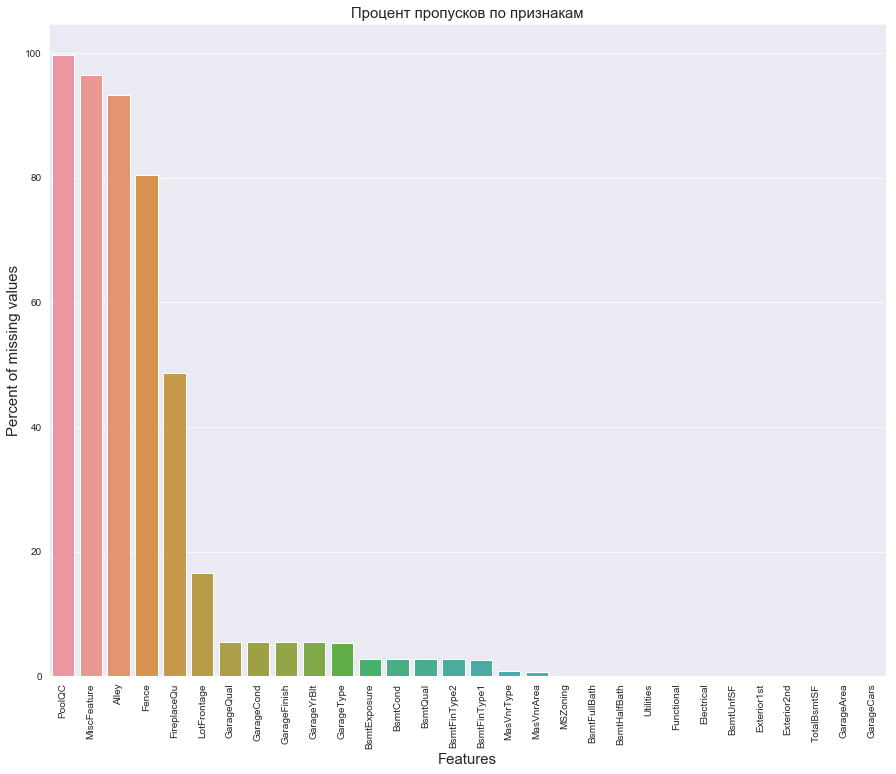

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Процент пропусков по признакам', fontsize=15)

### Коррелограмма

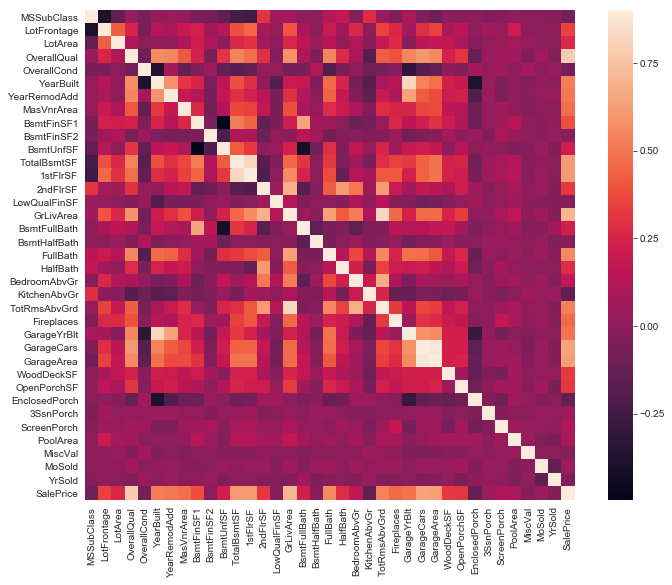

In [11]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Заполнение пропущенных значений

Колонка PoolQC - пропущенное значение = отсутствие бассейна

In [12]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

Колонка MiscFeature - пропущенное значение = отсутствуют дополнительные особенности

In [13]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Колонка Alley - пропущенное значение = отсутствие доступа к переулку

In [14]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Колонка Fence - пропущенное значение = отсутствие забора

In [15]:
all_data["Fence"] = all_data["Fence"].fillna("None")

Колонка FireplaceQu - пропущенное значение = отсутствие камина

In [16]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

В каждом районе размер улицы, соприкасающейся с участком примерно одинаков => заполняем медианой по району

In [17]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Аналогично заполняем пропущенные значения для признаков гаража

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath и BsmtHalfBath : пропущенные значения = нет подвала

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

и для категориальных признаков

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

Пропущенное значение = нет каменной облицовки

In [22]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

Классификация зданий - отсутствующие признаки можно заполнить модой

In [23]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Убираем этот признак, так как в тренировочном датасете встречается только признак AllPub

In [24]:
all_data['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [25]:
all_data = all_data.drop(['Utilities'], axis=1)

В описании датасета говорится, что NaN = обычный дом

In [26]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical : колонка имеет только один пропуск => заполним его модой

In [27]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Аналогично с признаком KitchenQual

In [28]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

Exterior1st и Exterior2nd аналогично заполняем модой (т.к. только одно пропущенное значение)

In [29]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

Аналогично SaleType

In [30]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass : Na - нет класса строительства => заполним его как 'None'

In [31]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Проверим, остались ли пропуски:

In [32]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Пропусков не осталось

## Feature engineering

Преобразуем численные данные, которые на самом деле такими не являются, в категориальные

In [33]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Сделаем Label Encoding тех признаков, в которых можно подразумевать определенный порядок

In [34]:

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Размер all_data: {}'.format(all_data.shape))

Размер all_data: (2919, 78)


Добавим новый признак "Общая площадь (1 этаж + 2 этаж + подвал)"

In [35]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Некоторые фичи имеют распределение, отличное от нормального, а, следовательно, смещение

In [53]:
from scipy import stats
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


Для приведения признаков к "нормальному" распределению применяем метод Бокса-Кокса

In [54]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


Делаем OneHotEncoding для всех категориальных фичей

In [55]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


Разбиваем данные на новый train-test

In [56]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Моделирование

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

Логтрансформируем таргет для метрики


 mu = 0.60 and sigma = 0.00



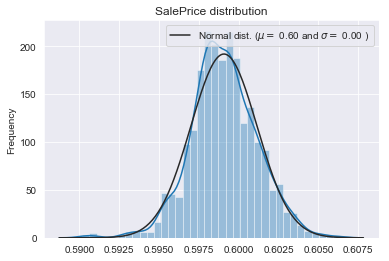

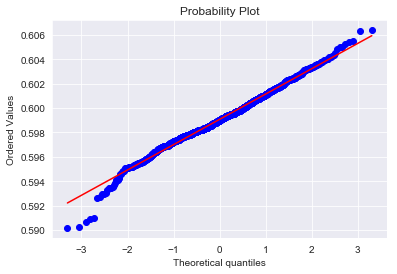

In [58]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)

#Check the new distribution 
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [59]:
# Функция валидации
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    # Метрика соревнования (корень из neg MSE)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Подбираем гиперпараметры модели Random Forest

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
rfr = RandomForestRegressor() # модель из коробки
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train.values, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [63]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [64]:
rfr = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1,
                            max_features='sqrt', max_depth=None, bootstrap=False, random_state=10
                           ) # модель с тюнингом
rf_score = rmsle_cv(rfr)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(rf_score.mean(), rf_score.std()))


Random Forest score: 0.0007 (0.0001)



Первые 15 по важности признаков

Feature ranking:
1 feature TotalSF (0.0917257926267583)
2 feature OverallQual (0.08320345048077663)
3 feature GrLivArea (0.0663970019464377)
4 feature GarageArea (0.044640508899454555)
5 feature GarageCars (0.04270214241556707)
6 feature YearBuilt (0.04248821652083554)
7 feature 1stFlrSF (0.03592167892452189)
8 feature TotalBsmtSF (0.034847205906804325)
9 feature FullBath (0.03484200736896027)
10 feature ExterQual (0.03375128141292666)
11 feature GarageYrBlt (0.0310476477229957)
12 feature YearRemodAdd (0.03022844826001747)
13 feature Fireplaces (0.023733816613175116)
14 feature BsmtQual (0.02311860234872712)
15 feature KitchenQual (0.022870292549114185)


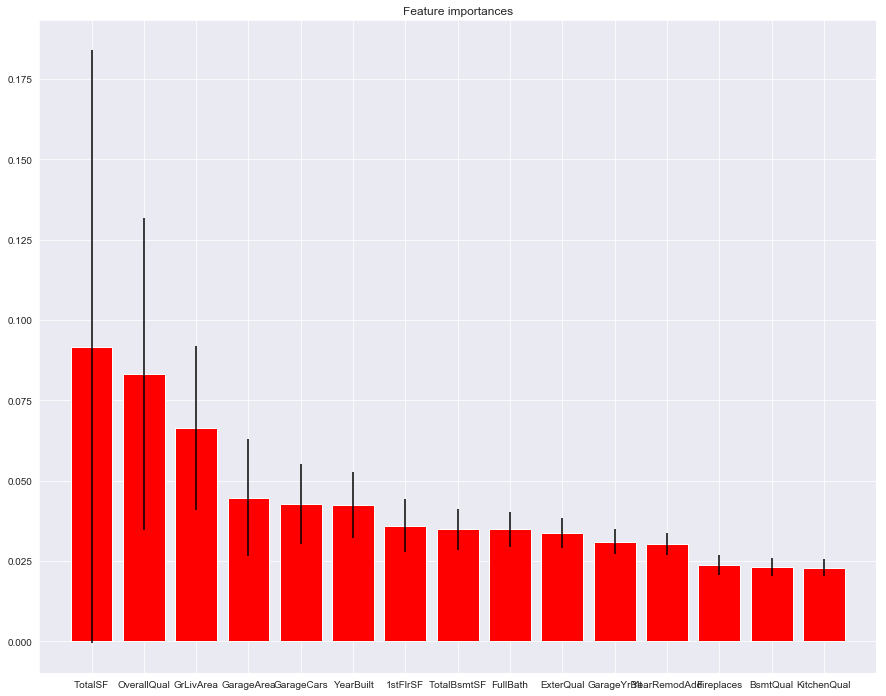

In [65]:
rfr.fit(train.values, y_train)

importances = list(zip(train.columns, rfr.feature_importances_))
best_importances = sorted(importances, key=lambda tup: tup[1], reverse=True)[:15]
std = np.std([sorted(tree.feature_importances_, reverse=True)[:15] for tree in rfr.estimators_],
             axis=0)
indices = list(zip(*best_importances))[0]
values = list(zip(*best_importances))[1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(values)):
    
    print("{} feature {} ({})".format(f+1, indices[f], values[f]))

# Plot the feature importances of the forest

f, ax = plt.subplots(figsize=(15, 12))
plt.title("Feature importances")
plt.bar(range(15), values, color="r", yerr=std, align="center")
plt.xticks(range(15), indices)

plt.xlim([-1, 15])
plt.show()

Для сравнения попробуем классическую линейную регрессию (неансамблевая модель для сравнения)

In [66]:
lr = make_pipeline(RobustScaler(), LinearRegression())

In [67]:
lr_score = rmsle_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(lr_score.mean(), lr_score.std()))


Linear Regression score: 0.0007 (0.0001)



## Стекинг моделей

### Стекинг с усреднением

Простой подход - усредняем предсказания 3х моделей. Сделаем новый класс, унаследуемся от базовых классов sklearn для такого же вызова fit-predict

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # клонируем модели для дальнейшего фита
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Тренируем клонированные модели
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Предсказываем и усредняем предсказания
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

К первым двум моделям (RF и LR) добавим третью - градиентный бустинг (GradientBoostingRegressor)

In [69]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [70]:
GB_score = rmsle_cv(GBoost)
print(" GBoost score: {:.6f} ({:.6f})\n".format(GB_score.mean(), GB_score.std()))

 GBoost score: 0.000652 (0.000102)



In [71]:
averaged_models = AveragingModels(models = (GBoost, rfr, lr))

avg_score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.6f} ({:.6f})\n".format(avg_score.mean(), avg_score.std()))

Averaged base models score: 0.000643 (0.000098)



При стекинге с простым усреднением видно, что качество модели по сравнению с GBoost улучшилось даже в комбинации с менее подходящими под задачу моделями

## Стекинг с метамоделью

Смоделируем еще один класс, унаследованный от базовых классов sklearn, но переопределим методы fit и predict так, чтобы итоговый фит был на мета-модель

In [72]:
kfold = KFold(n_splits=10, shuffle=True, random_state=156)
for train_index, holdout_index in kfold.split(train.values, y_train):
    print(train_index)

[   0    1    2 ... 1457 1458 1459]
[   0    1    2 ... 1457 1458 1459]
[   0    1    2 ... 1456 1457 1459]
[   0    1    2 ... 1457 1458 1459]
[   1    2    3 ... 1457 1458 1459]
[   0    1    2 ... 1456 1457 1458]
[   0    1    3 ... 1457 1458 1459]
[   0    1    2 ... 1457 1458 1459]
[   0    2    3 ... 1456 1458 1459]
[   0    1    2 ... 1457 1458 1459]


In [73]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models # список базовых моделей для стекинга
        self.meta_model = meta_model # метамодель
        self.n_folds = n_folds # количество фолдов разбиения "кросс-валидации"
   
    # здесь мы фиттим модели для стекинга, склонировав их
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models] # инициализируем пустые списки для моделей
        self.meta_model_ = clone(self.meta_model) # клонируем метамодель
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156) # инициализируем kfold для кросс-валидации
        
        # тренируем модели, предсказания на кросс-валидационной выборке заносим в холдаут-датасет
        # потом тренируем мета-модель
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models))) # заполняем холдаут-датасет нулями
        for i, model in enumerate(self.base_models): # для каждой модели из исходного списка
            for train_index, holdout_index in kfold.split(X, y): # разбиение на 10 разных фолдов
                instance = clone(model) # берем модель из исходных
                self.base_models_[i].append(instance) # добавляем в список моделей
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # тренируем мета-модель на холдаут-датасете
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Проверим скор модели, метамоделью сделаем Лассо-регрессию

In [74]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [75]:
stacked_averaged_models = StackingAveragedModels(base_models = (GBoost, rfr, lr),
                                                 meta_model = lasso)

st_score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(st_score.mean(), st_score.std()))

Stacking Averaged models score: 0.0009 (0.0001)


Итоговый скор модели с hold-out датасетом получился наилучшим даже при достаточно простых моделях (RandomForest, Linear, GBoost, hold: Lasso)

In [76]:
print("Random Forest: {:.4f} ({:.4f})".format(rf_score.mean(), rf_score.std()))
print("Linear Regression: {:.4f} ({:.4f})".format(lr_score.mean(), lr_score.std()))
print("Gradient Boosting: {:.4f} ({:.4f})".format(GB_score.mean(), GB_score.std()))
print("Stacking with mean: {:.4f} ({:.4f})".format(avg_score.mean(), avg_score.std())) 
print("Stacking with meta-model: {:.4f} ({:.4f})".format(st_score.mean(), st_score.std()))

Random Forest: 0.0007 (0.0001)
Linear Regression: 0.0007 (0.0001)
Gradient Boosting: 0.0007 (0.0001)
Stacking with mean: 0.0006 (0.0001)
Stacking with meta-model: 0.0009 (0.0001)


# Сформируем предсказания на тесте для Kaggle

In [79]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

In [80]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = stacked_pred
sub.to_csv('submission.csv',index=False)

<img src="ens_submission.png"></img>